In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [189]:
# Load the CSV data for static TL
df_static = pd.read_csv("outputs/static_vehicle_data/processed_static_vehicle_data.csv")

# Remove trailing spaces in column names
df_static.columns = df_static.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_static = df_static[(df_static['data_timestep'] >= 900) & (df_static['data_timestep'] <= 4500)]

In [190]:
# Load the CSV data for QL
df_dynamic_QL = pd.read_csv("outputs/dynamic_QL_vehicle_data/processed_dynamic_vehicle_data.csv")

# Remove trailing spaces in column names
df_dynamic_QL.columns = df_dynamic_QL.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_dynamic_QL = df_dynamic_QL[(df_dynamic_QL['data_timestep'] >= 900) & (df_dynamic_QL['data_timestep'] <= 4500)]

In [191]:
# Load the CSV data for DQL
df_dynamic_DQL = pd.read_csv("outputs/dynamic_DQL_vehicle_data/processed_dynamic_DQL_vehicle_data.csv")

# Remove trailing spaces in column names
df_dynamic_DQL.columns = df_dynamic_DQL.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_dynamic_DQL = df_dynamic_DQL[(df_dynamic_DQL['data_timestep'] >= 900) & (df_dynamic_DQL['data_timestep'] <= 4500)]

In [192]:
# for queue lengths
df_dynamic_QL['lane_queueing_length_experimental'] = pd.to_numeric(df_dynamic_QL['lane_queueing_length_experimental'], 
                                                    errors='coerce')
df_static['lane_queueing_length_experimental'] = pd.to_numeric(df_static['lane_queueing_length_experimental'], 
                                                    errors='coerce')
df_dynamic_DQL['lane_queueing_length_experimental'] = pd.to_numeric(df_dynamic_DQL['lane_queueing_length_experimental'], 
                                                    errors='coerce')

# for waiting times
df_dynamic_QL['lane_queueing_time'] = pd.to_numeric(df_dynamic_QL['lane_queueing_time'], 
                                                    errors='coerce')
df_static['lane_queueing_time'] = pd.to_numeric(df_static['lane_queueing_time'], 
                                                    errors='coerce')
df_dynamic_DQL['lane_queueing_time'] = pd.to_numeric(df_dynamic_DQL['lane_queueing_time'], 
                                                    errors='coerce')


In [193]:
# for queue lengths
total_queue_length_static = df_static.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()
total_queue_length_dynamic_QL = df_dynamic_QL.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()
total_queue_length_dynamic_DQL = df_dynamic_DQL.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()

# for waiting times
total_queue_time_dynamic_QL = df_dynamic_QL.groupby('data_timestep')['lane_queueing_time'].sum().reset_index()
total_queue_time_static = df_static.groupby('data_timestep')['lane_queueing_time'].sum().reset_index()
total_queue_time_dynamic_DQL = df_dynamic_DQL.groupby('data_timestep')['lane_queueing_time'].sum().reset_index()

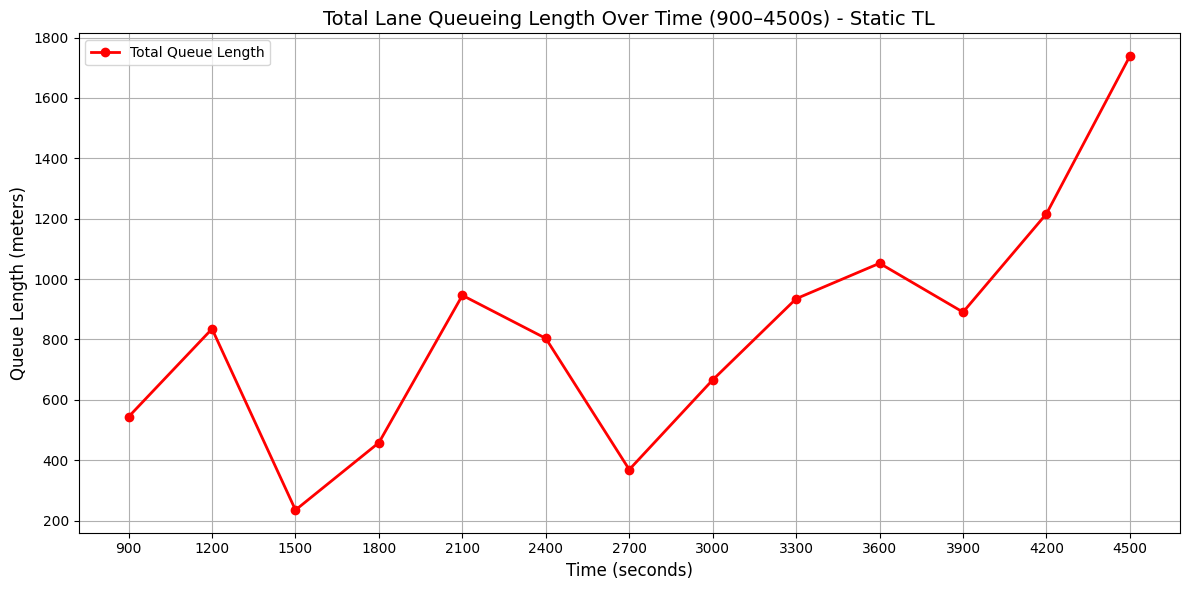

In [194]:
# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_length_static['data_timestep'], total_queue_length_static['lane_queueing_length_experimental'], 
         label='Total Queue Length', marker='o', color='red', linewidth=2)

# Customize plot
plt.title('Total Lane Queueing Length Over Time (900–4500s) - Static TL', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()

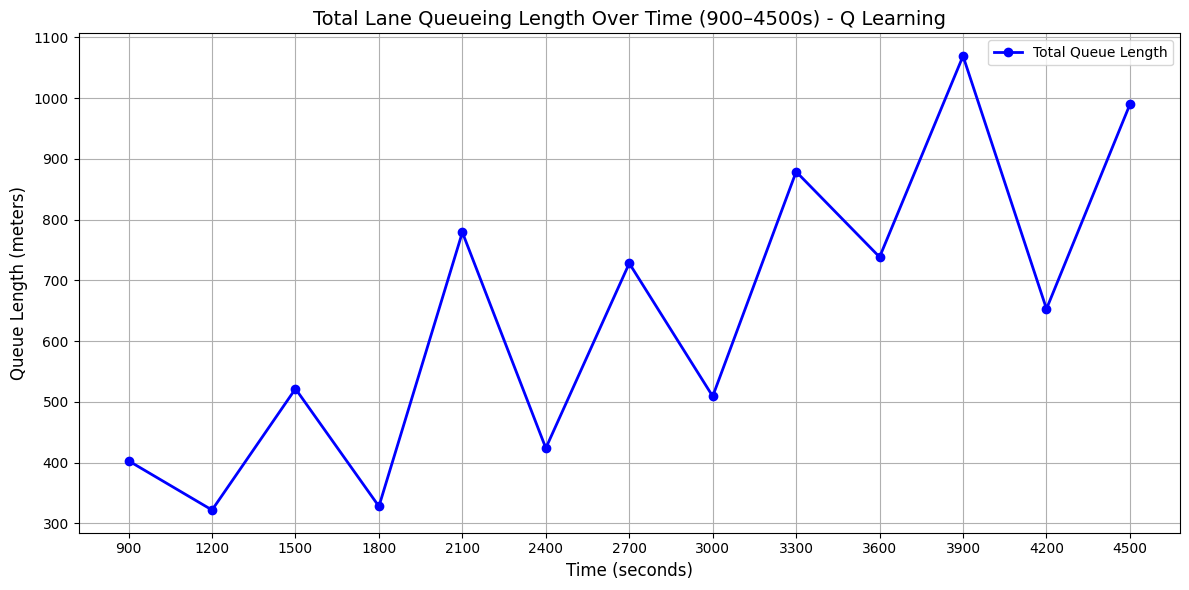

In [195]:
# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_length_dynamic_QL['data_timestep'], total_queue_length_dynamic_QL['lane_queueing_length_experimental'], 
         label='Total Queue Length', marker='o', color='blue', linewidth=2)

# Customize plot
plt.title('Total Lane Queueing Length Over Time (900–4500s) - Q Learning', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()


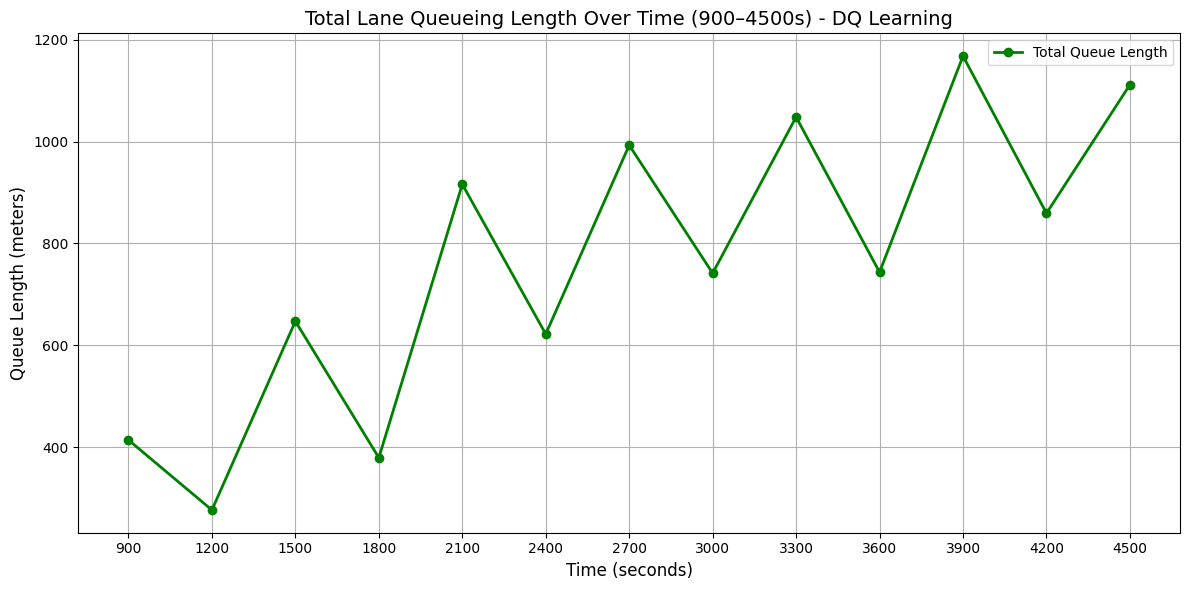

In [196]:
# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_length_dynamic_DQL['data_timestep'], total_queue_length_dynamic_DQL['lane_queueing_length_experimental'], 
         label='Total Queue Length', marker='o', color='green', linewidth=2)

# Customize plot
plt.title('Total Lane Queueing Length Over Time (900–4500s) - DQ Learning', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()

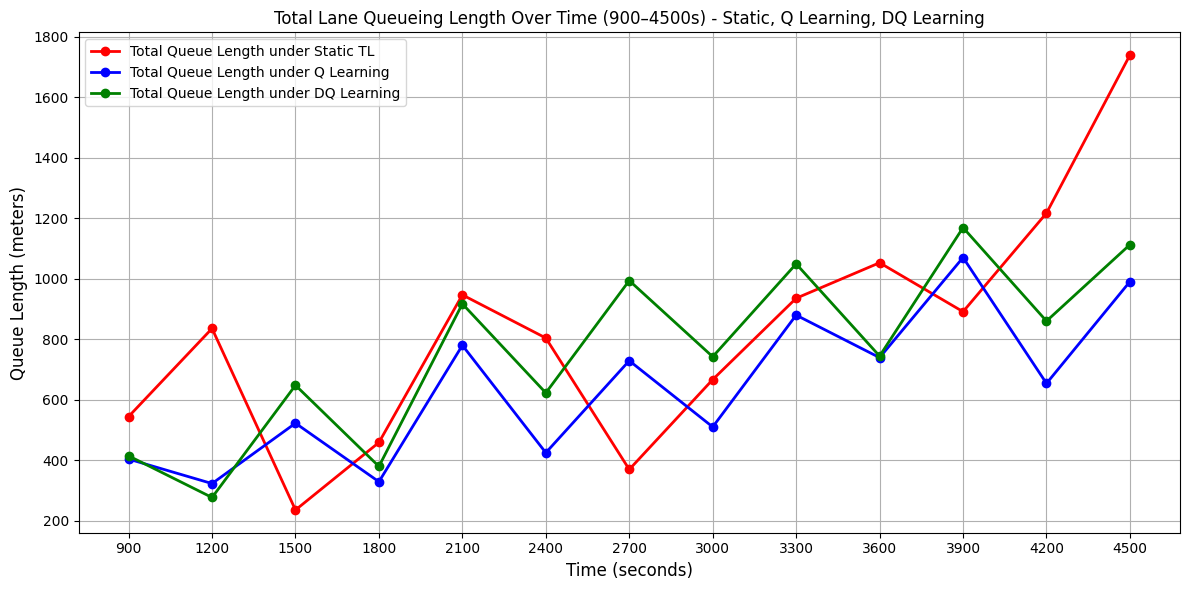

In [197]:
# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_length_static['data_timestep'], total_queue_length_static['lane_queueing_length_experimental'], 
         label='Total Queue Length under Static TL', marker='o', color='red', linewidth=2)
plt.plot(total_queue_length_dynamic_QL['data_timestep'], total_queue_length_dynamic_QL['lane_queueing_length_experimental'], 
         label='Total Queue Length under Q Learning', marker='o', color='blue', linewidth=2)
plt.plot(total_queue_length_dynamic_DQL['data_timestep'], total_queue_length_dynamic_DQL['lane_queueing_length_experimental'], 
         label='Total Queue Length under DQ Learning', marker='o', color='green', linewidth=2)

# Customize plot
plt.title('Total Lane Queueing Length Over Time (900–4500s) - Static, Q Learning, DQ Learning', fontsize=12)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()

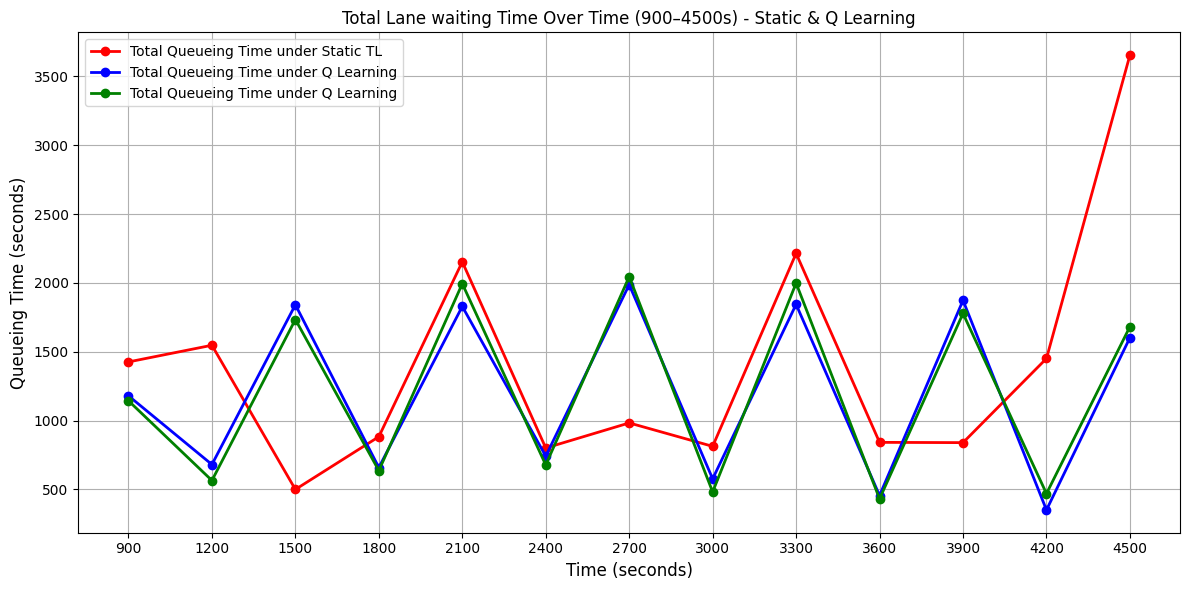

In [198]:
# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_time_static['data_timestep'], total_queue_time_static['lane_queueing_time'], 
         label='Total Queueing Time under Static TL', marker='o', color='red', linewidth=2)
plt.plot(total_queue_time_dynamic_QL['data_timestep'], total_queue_time_dynamic_QL['lane_queueing_time'], 
         label='Total Queueing Time under Q Learning', marker='o', color='blue', linewidth=2)
plt.plot(total_queue_time_dynamic_DQL['data_timestep'], total_queue_time_dynamic_DQL['lane_queueing_time'], 
         label='Total Queueing Time under Q Learning', marker='o', color='green', linewidth=2)

# Customize plot
plt.title('Total Lane waiting Time Over Time (900–4500s) - Static & Q Learning', fontsize=12)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queueing Time (seconds)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()

In [199]:
df_combined = pd.merge(
    total_queue_length_static, 
    total_queue_length_dynamic_QL, 
    on='data_timestep', 
    suffixes=('_static', '_dynamic_QL')
)

df_combined['difference'] = df_combined['lane_queueing_length_experimental_static'] - df_combined['lane_queueing_length_experimental_dynamic_QL']
df_combined['percentage_improvement'] = (df_combined['difference'] / df_combined['lane_queueing_length_experimental_static']) * 100

total_static = df_combined['lane_queueing_length_experimental_static'].sum()
total_dynamic_QL = df_combined['lane_queueing_length_experimental_dynamic_QL'].sum()

absolute_reduction = total_static - total_dynamic_QL
percent_reduction = (absolute_reduction / total_static) * 100

print(f"Total Static Queue Length: {total_static:.2f} m")
print(f"Total Q Learning Queue Length: {total_dynamic_QL:.2f} m")
print(f"Total Reduction: {absolute_reduction:.2f} m ({percent_reduction:.2f}%)")

Total Static Queue Length: 10688.01 m
Total Q Learning Queue Length: 8346.56 m
Total Reduction: 2341.45 m (21.91%)


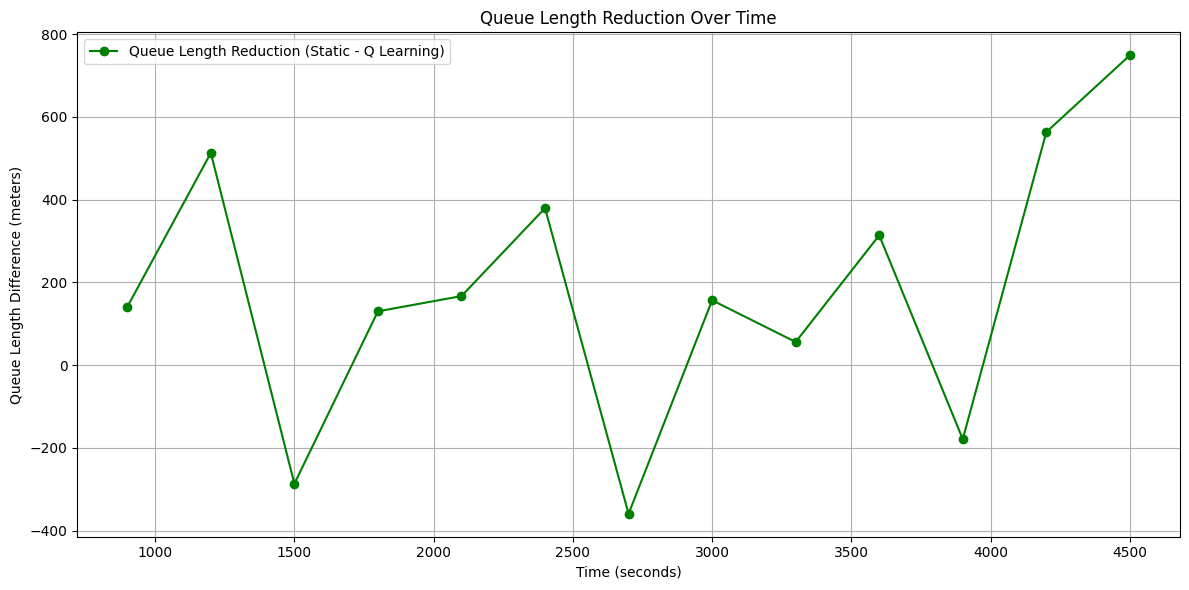

In [200]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined['data_timestep'], df_combined['difference'], 
         label='Queue Length Reduction (Static - Q Learning)', color='green', marker='o')

plt.title('Queue Length Reduction Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Queue Length Difference (meters)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [201]:
df_combined = pd.merge(
    total_queue_length_static, 
    total_queue_length_dynamic_DQL, 
    on='data_timestep', 
    suffixes=('_static', '_dynamic_DQL')
)

df_combined['difference'] = df_combined['lane_queueing_length_experimental_static'] - df_combined['lane_queueing_length_experimental_dynamic_DQL']
df_combined['percentage_improvement'] = (df_combined['difference'] / df_combined['lane_queueing_length_experimental_static']) * 100

total_static = df_combined['lane_queueing_length_experimental_static'].sum()
total_dynamic_DQL = df_combined['lane_queueing_length_experimental_dynamic_DQL'].sum()

absolute_reduction = total_static - total_dynamic_DQL
percent_reduction = (absolute_reduction / total_static) * 100

print(f"Total Static Queue Length: {total_static:.2f} m")
print(f"Total DQ Learning Queue Length: {total_dynamic_DQL:.2f} m")
print(f"Total Reduction: {absolute_reduction:.2f} m ({percent_reduction:.2f}%)")

Total Static Queue Length: 10688.01 m
Total DQ Learning Queue Length: 9920.75 m
Total Reduction: 767.26 m (7.18%)


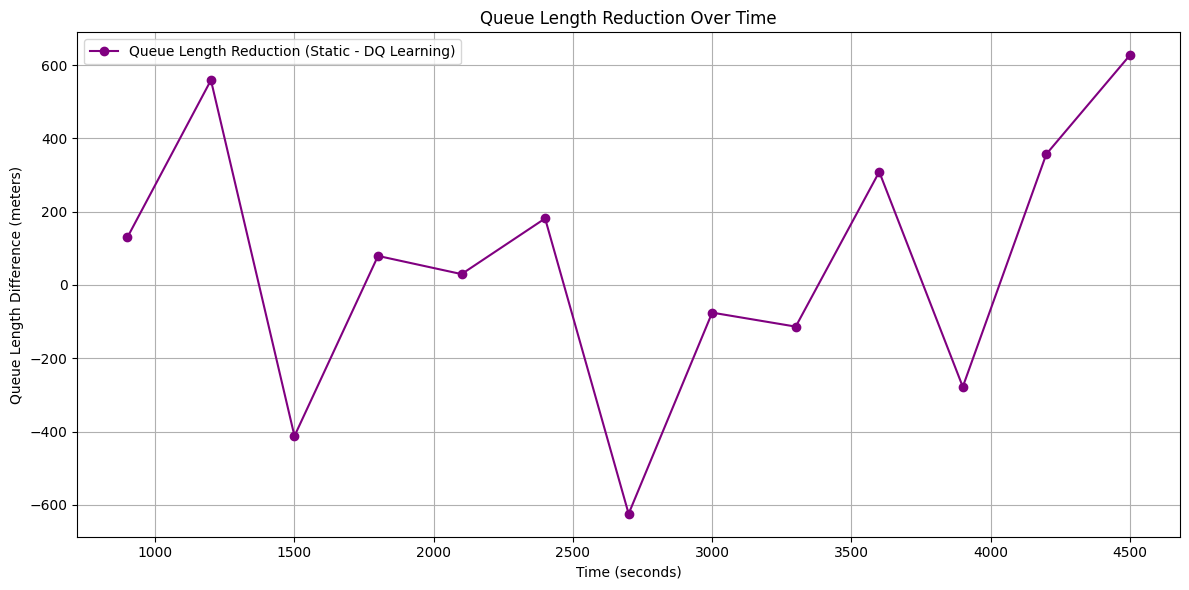

In [202]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined['data_timestep'], df_combined['difference'], 
         label='Queue Length Reduction (Static - DQ Learning)', color='purple', marker='o')

plt.title('Queue Length Reduction Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Queue Length Difference (meters)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [203]:
df_combined = pd.merge(
    total_queue_time_static, 
    total_queue_time_dynamic_QL, 
    on='data_timestep', 
    suffixes=('_static', '_dynamic_QL')
)

df_combined['difference'] = df_combined['lane_queueing_time_static'] - df_combined['lane_queueing_time_dynamic_QL']
df_combined['percentage_improvement'] = (df_combined['difference'] / df_combined['lane_queueing_time_static']) * 100

total_static = df_combined['lane_queueing_time_static'].sum()
total_dynamic_QL = df_combined['lane_queueing_time_dynamic_QL'].sum()

absolute_reduction = total_static - total_dynamic_QL
percent_reduction = (absolute_reduction / total_static) * 100

print(f"Total Static Waiting time: {total_static:.2f} m")
print(f"Total Q Learning Waiting time: {total_dynamic_QL:.2f} m")
print(f"Total Reduction: {absolute_reduction/60:.2f} min ({percent_reduction:.2f}%)")

Total Static Waiting time: 18107.00 m
Total Q Learning Waiting time: 15622.00 m
Total Reduction: 41.42 min (13.72%)


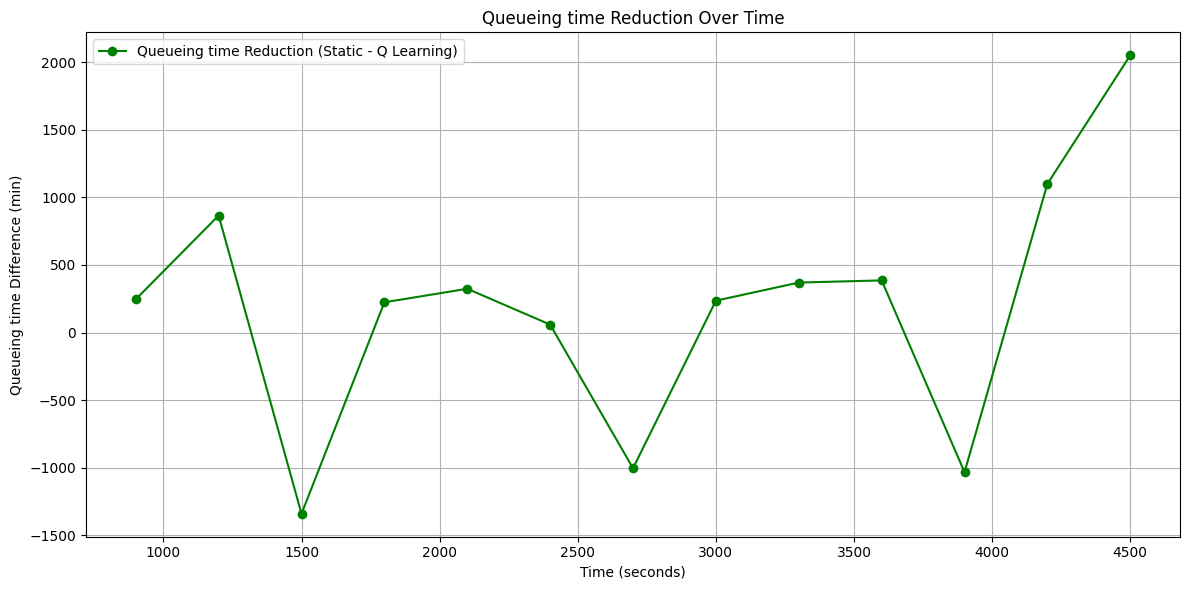

In [204]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined['data_timestep'], df_combined['difference'], 
         label='Queueing time Reduction (Static - Q Learning)', color='green', marker='o')

plt.title('Queueing time Reduction Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Queueing time Difference (min)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [205]:
df_combined = pd.merge(
    total_queue_time_static, 
    total_queue_time_dynamic_DQL, 
    on='data_timestep', 
    suffixes=('_static', '_dynamic_DQL')
)

df_combined['difference'] = df_combined['lane_queueing_time_static'] - df_combined['lane_queueing_time_dynamic_DQL']
df_combined['percentage_improvement'] = (df_combined['difference'] / df_combined['lane_queueing_time_static']) * 100

total_static = df_combined['lane_queueing_time_static'].sum()
total_dynamic_QL = df_combined['lane_queueing_time_dynamic_DQL'].sum()

absolute_reduction = total_static - total_dynamic_QL
percent_reduction = (absolute_reduction / total_static) * 100

print(f"Total Static Waiting time: {total_static:.2f} m")
print(f"Total Q Learning Waiting time: {total_dynamic_DQL:.2f} m")
print(f"Total Reduction: {absolute_reduction/60:.2f} min ({percent_reduction:.2f}%)")

Total Static Waiting time: 18107.00 m
Total Q Learning Waiting time: 9920.75 m
Total Reduction: 41.13 min (13.63%)


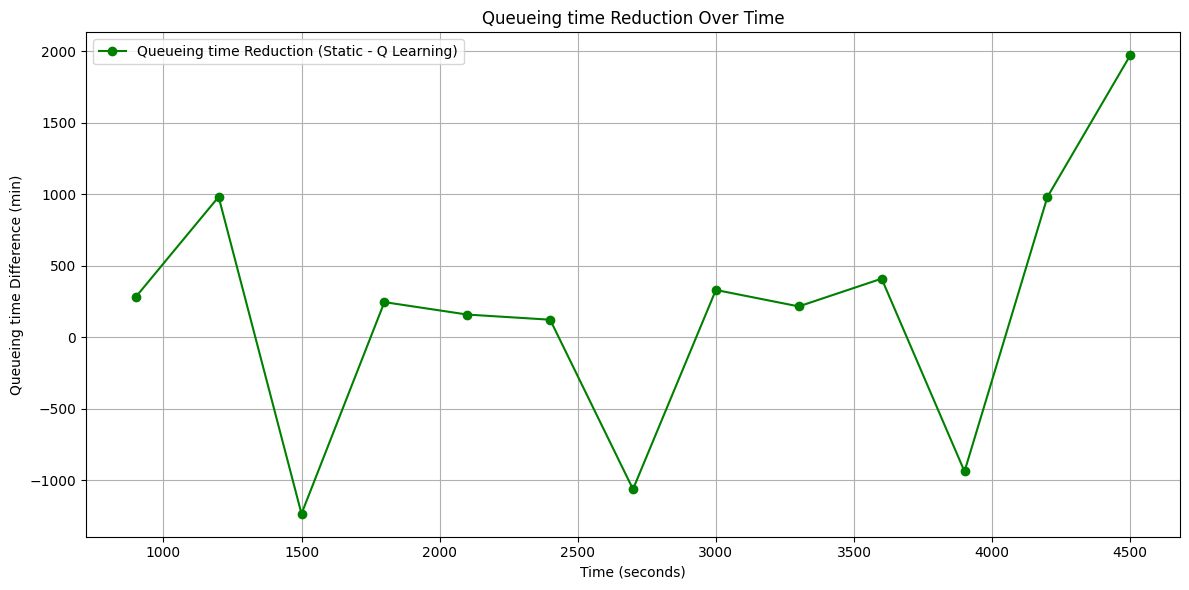

In [206]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined['data_timestep'], df_combined['difference'], 
         label='Queueing time Reduction (Static - Q Learning)', color='green', marker='o')

plt.title('Queueing time Reduction Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Queueing time Difference (min)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()